In [1]:
import pandas as pd
# Load the transfer learning tweet dataset
df = pd.read_csv('finalSentimentdata2.csv')
df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#checking if there any NAN value or not
df.isnull().sum()

Unnamed: 0    0
sentiment     0
text          0
dtype: int64

In [4]:
# droping the unnecesary colmns 
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [5]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [6]:
df['sentiment'].value_counts()

fear     801
sad      795
anger    767
joy      727
Name: sentiment, dtype: int64

C:\Users\softuser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

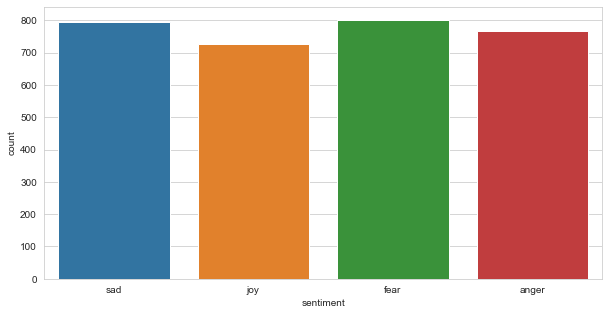

In [7]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(df['sentiment'])

In [8]:
from sklearn.preprocessing import LabelEncoder
scaler=LabelEncoder()
df['sentiment']=scaler.fit_transform(df['sentiment'])

In [9]:
#1 for fear
#3 for sad
#0 for anger
#2 for joy
df['sentiment'].value_counts()

1    801
3    795
0    767
2    727
Name: sentiment, dtype: int64

In [10]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [11]:
df['text'][:5]

0    agree the poor in india are treated badly thei...
1    if only i could have spent the with this cutie...
2    will nature conservation remain a priority in ...
3    coronavirus disappearing in italy show this to...
4    uk records lowest daily virus death toll since...
Name: text, dtype: object

In [12]:
df.shape

(3090, 2)

In [13]:
#making the copy of original datasets
message=df.copy()

In [14]:
message.head(3)

,sentiment,text
0,3,agree the poor in india are treated badly thei...
1,2,if only i could have spent the with this cutie...
2,2,will nature conservation remain a priority in ...


In [15]:
message.isnull().sum()

sentiment    0
text         0
dtype: int64

In [16]:
message['text'][0]

'agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals'

In [17]:
para=''''agree the poor in india are treated badly their poors 
seek a living in singapore and are treated like citizens they 
are given free medical treatment given food daily sim cards
to call home to tell their family that they are fine if covid 
19 case treated foc in hospitals'''

In [18]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review=re.sub(r'http\S+',' ',para) #removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then stemming the text 
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
corpus.append(review)

In [25]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install nltk

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\softuser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [19]:
corpus

['agre poor india treat badli poor seek live singapor treat like citizen given free medic treatment given food daili sim card call home tell famili fine covid case treat foc hospit']

In [20]:
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()

corpus_lem=[]
review=re.sub(r'http\S+',' ',para)#removing all the link releted text
review = re.sub('[^a-zA-Z]', ' ', review)# removing all the element except a-z and A-Z
review = review.lower()#lowering the text
review = review.split()

#removing all the stopwords and then lemmatizing the text 
review=[lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
review=' '.join(review)
corpus_lem.append(review)
    
corpus_lem

['agree poor india treated badly poor seek living singapore treated like citizen given free medical treatment given food daily sim card call home tell family fine covid case treated foc hospital']

In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\softuser\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [21]:
#stemming and cleaning
corpus_stem = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_stem.append(review)

In [22]:
len(message)

3090

In [23]:
df2=pd.DataFrame(df['sentiment'],index=None)

In [24]:
df2['stemming_text']=corpus_stem

In [25]:
df2.head(4)

,sentiment,stemming_text
0,3,agre poor india treat badli poor seek live sin...
1,2,could spent cuti vc sakshi n g h coast cross r...
2,2,natur conserv remain prioriti post corona bang...
3,3,coronaviru disappear itali show intellectu say...


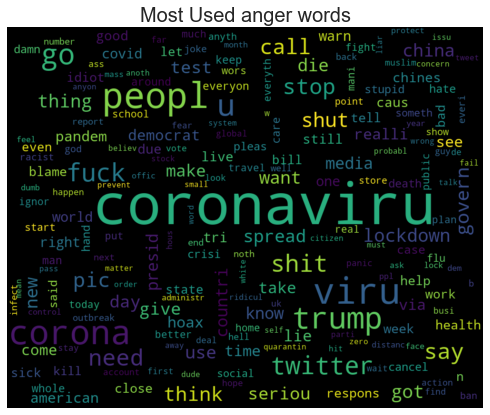

In [26]:
from wordcloud import WordCloud
anger_text = df2[df2['sentiment'] == 0]
all_words = ' '.join([text for text in anger_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used anger words", fontsize=20)
plt.axis("off")
plt.show()

In [39]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


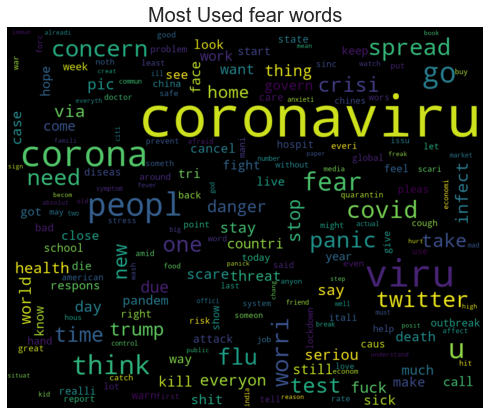

In [27]:
from wordcloud import WordCloud
fear_text = df2[df2['sentiment'] == 1]
all_words = ' '.join([text for text in fear_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used fear words", fontsize=20)
plt.axis("off")
plt.show()

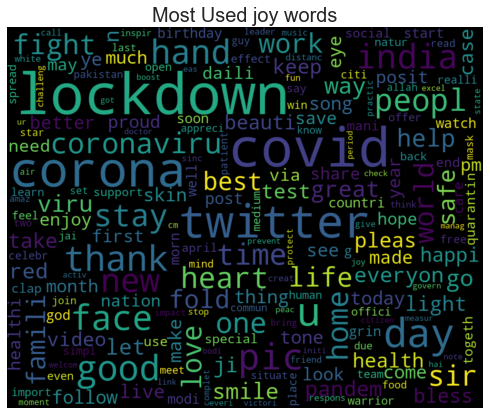

In [29]:
from wordcloud import WordCloud
joy_text = df2[df2['sentiment'] == 2]
all_words = ' '.join([text for text in joy_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used joy words", fontsize=20)
plt.axis("off")
plt.show()

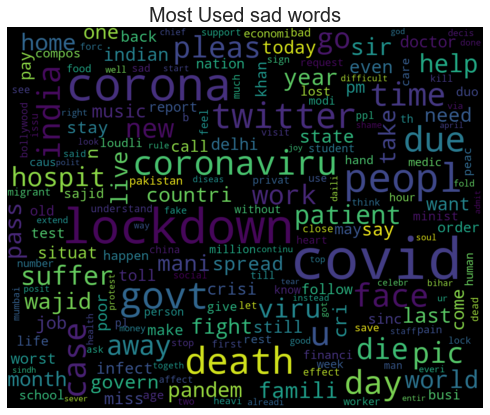

In [30]:
from wordcloud import WordCloud
sad_text = df2[df2['sentiment'] == 3]
all_words = ' '.join([text for text in sad_text.stemming_text])
wordcloud = WordCloud(width= 1000, height= 800,
                          max_font_size = 120,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Used sad words", fontsize=20)
plt.axis("off")
plt.show()

In [31]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(15,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'yellow')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

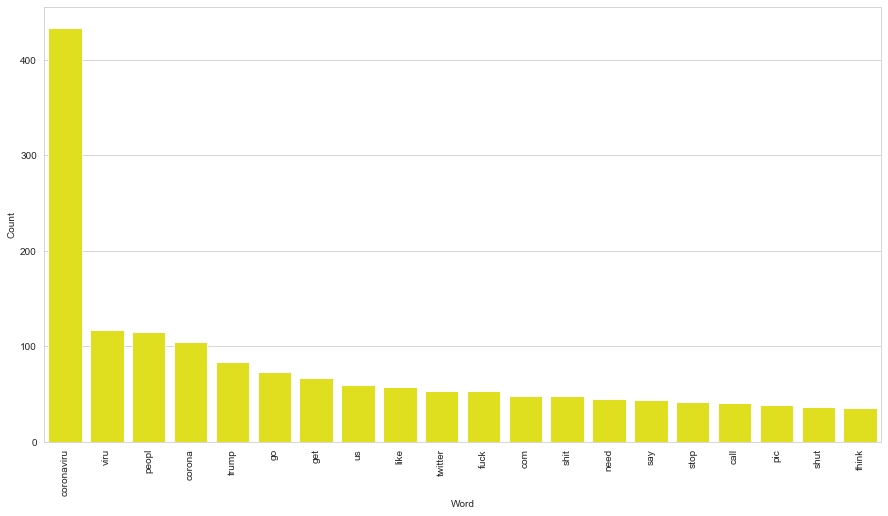

In [32]:
#frequency of most anger words
counter(df2[df2['sentiment'] == 0], 'stemming_text', 20)


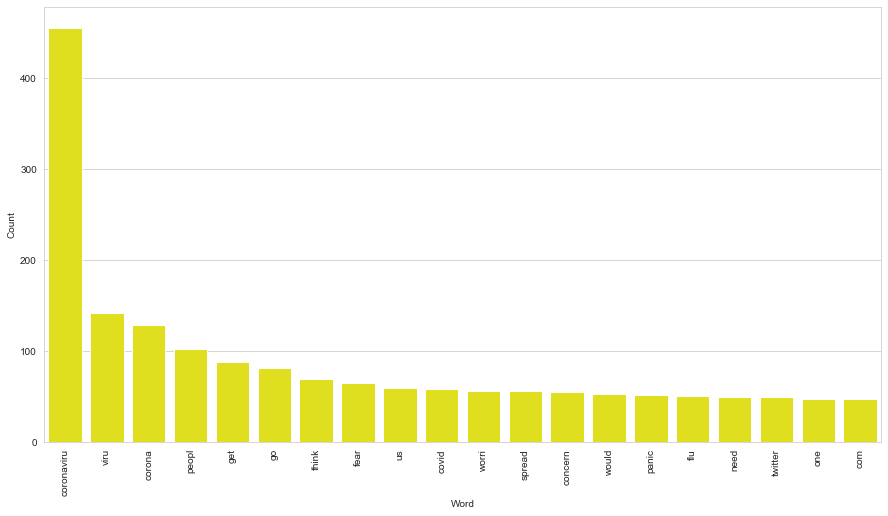

In [33]:
#frequency of most fear words
counter(df2[df2['sentiment'] == 1], 'stemming_text', 20)

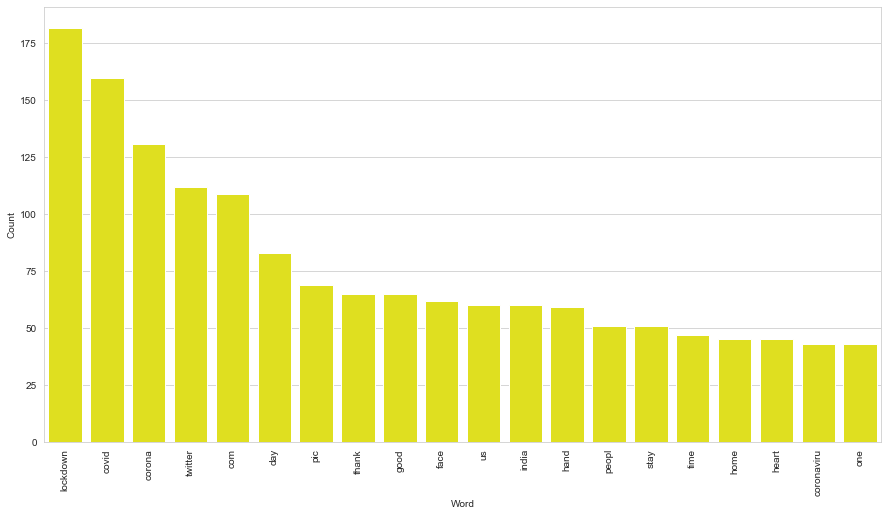

In [34]:
#frequency of most joy words
counter(df2[df2['sentiment'] == 2], 'stemming_text', 20)

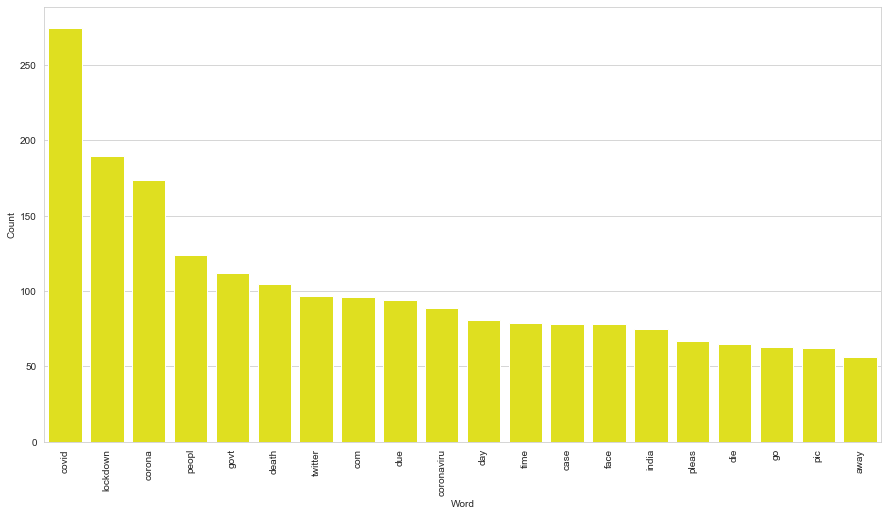

In [35]:
#frequency of most sad words
counter(df2[df2['sentiment'] == 3], 'stemming_text', 20)

In [36]:
corpus_lemmetize = []
for i in range(0, len(message)):
    review=re.sub(r'http\S+',' ',message['text'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    
    review = [lem.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus_lemmetize.append(review)

In [37]:
corpus_lemmetize[:2]

['agree poor india treated badly poor seek living singapore treated like citizen given free medical treatment given food daily sim card call home tell family fine covid case treated foc hospital',
 'could spent cutie vc sakshi n g h coast crossing republik']

In [38]:
len(corpus_lemmetize)

3090

In [39]:
#countvectoriser with stemming

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000, ngram_range=(1,3))
x_stem=CV.fit_transform(corpus_stem).toarray()
x_stem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
print(x_stem.shape)

(3090, 5000)


In [41]:
#countvectorizer with lemmetizing

from sklearn.feature_extraction.text import CountVectorizer
CV=CountVectorizer(max_features=5000)
x_lem=CV.fit_transform(corpus_lemmetize).toarray()
x_lem

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
print(x_lem.shape)

(3090, 5000)


In [43]:
#TF-IDF for stemming

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_stem=tf_stem.fit_transform(corpus_stem)
print(x_tf_stem.shape)

(3090, 7534)


In [44]:
#TF-IDF for lemmatizing

from sklearn.feature_extraction.text import TfidfVectorizer
tf_stem=TfidfVectorizer()
x_tf_lem=tf_stem.fit_transform(corpus_lemmetize)
print(x_tf_lem.shape)

(3090, 9054)


In [45]:
y=df['sentiment']
y[:5]

0    3
1    2
2    2
3    3
4    3
Name: sentiment, dtype: int32

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 5000), (618, 5000), (2472,), (618,))

In [48]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [49]:
model.score(X_test,y_test)

0.6844660194174758

In [50]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 87,  43,   6,   7],
       [ 53, 106,   7,   7],
       [  8,   7, 111,  15],
       [ 15,  10,  17, 119]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57       143
           1       0.64      0.61      0.63       173
           2       0.79      0.79      0.79       141
           3       0.80      0.74      0.77       161

    accuracy                           0.68       618
   macro avg       0.69      0.69      0.69       618
weighted avg       0.69      0.68      0.69       618



Text(70.0, 0.5, 'True')

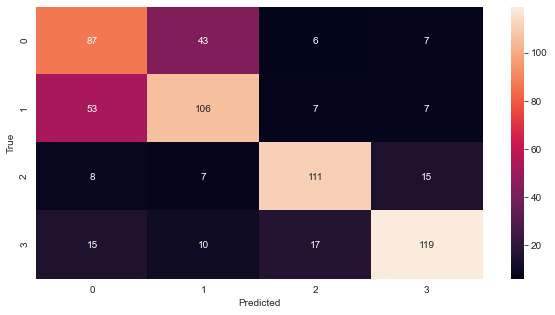

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_lem,y,test_size=0.2)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2472, 5000), (618, 5000), (2472,), (618,))

In [55]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [56]:
model.score(X_test,y_test)

0.6731391585760518

In [57]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 80,  44,   4,  13],
       [ 33, 117,   7,  11],
       [  9,  15, 103,  26],
       [  8,  12,  20, 116]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       141
           1       0.62      0.70      0.66       168
           2       0.77      0.67      0.72       153
           3       0.70      0.74      0.72       156

    accuracy                           0.67       618
   macro avg       0.68      0.67      0.67       618
weighted avg       0.68      0.67      0.67       618



Text(70.0, 0.5, 'True')

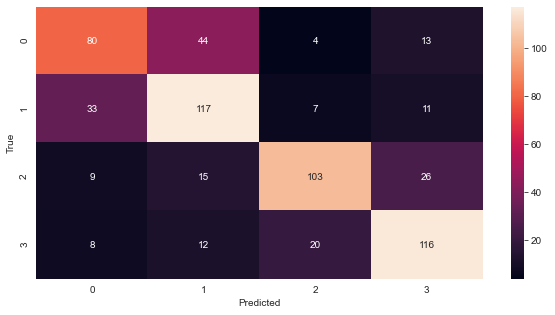

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [60]:
#Making the model by using TF-IDF and lemmetizing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_tf_lem,y,test_size=0.2)

In [61]:
x_tf_lem.shape

(3090, 9054)

In [62]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [63]:
model.score(X_test,y_test)

0.63915857605178

In [64]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 66,  96,   3,  14],
       [ 20, 112,   4,  16],
       [  3,  11,  96,  29],
       [  4,  13,  10, 121]], dtype=int64)

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49       179
           1       0.48      0.74      0.58       152
           2       0.85      0.69      0.76       139
           3       0.67      0.82      0.74       148

    accuracy                           0.64       618
   macro avg       0.68      0.65      0.64       618
weighted avg       0.68      0.64      0.63       618



Text(70.0, 0.5, 'True')

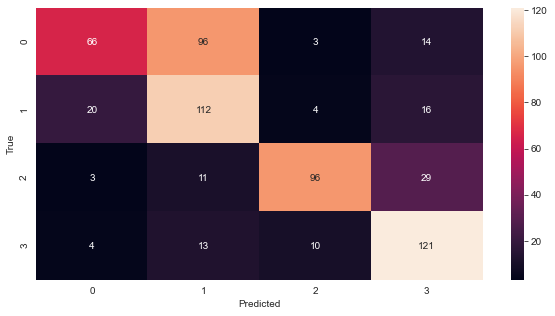

In [66]:
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')

In [67]:
#Let's check the accuracy after applying hyperparameter in MultinomialNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

classifier=MultinomialNB(alpha=0.1)

from sklearn import metrics
import numpy as np
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\softuser\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.580906148867314
Alpha: 0.1, Score : 0.6375404530744336
Alpha: 0.2, Score : 0.6407766990291263
Alpha: 0.30000000000000004, Score : 0.6504854368932039
Alpha: 0.4, Score : 0.6472491909385113
Alpha: 0.5, Score : 0.6521035598705501
Alpha: 0.6000000000000001, Score : 0.6521035598705501
Alpha: 0.7000000000000001, Score : 0.6504854368932039
Alpha: 0.8, Score : 0.6553398058252428
Alpha: 0.9, Score : 0.6601941747572816


In [68]:
#when alpha=0.9 its gives the maximumn accuracy of 0.6601941747572816
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15,20,25,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear'),
        'params': {
            'C': [1,5,10,15,20,25]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy']
        }
    }
}

In [70]:
scores = []

X_train, X_test, y_train, y_test= train_test_split(x_stem,y,test_size=0.2)

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,random_forest,0.626627,{'n_estimators': 30}
1,logistic_regression,0.683680,{'C': 5}
2,decision_tree,0.548155,{'criterion': 'entropy'}


In [72]:
model1=LogisticRegression(solver='liblinear')

In [73]:
model1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [76]:
pred=model1.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       144
           1       0.72      0.67      0.69       168
           2       0.75      0.84      0.79       141
           3       0.80      0.78      0.79       165

    accuracy                           0.73       618
   macro avg       0.73      0.73      0.73       618
weighted avg       0.73      0.73      0.73       618



In [78]:
print(pred)

[3 3 0 3 3 0 0 1 0 0 0 1 0 3 0 0 2 0 3 3 2 0 3 3 3 2 2 0 2 1 3 1 3 0 2 2 2
 3 3 0 2 2 1 3 1 1 2 3 0 2 2 3 1 1 3 0 0 1 1 0 1 3 3 2 1 3 0 1 1 3 0 3 1 1
 3 2 2 2 2 0 0 1 0 1 3 3 1 0 2 1 0 3 0 3 0 0 3 2 0 1 3 1 0 0 1 2 1 1 1 3 2
 2 3 1 1 1 2 2 1 1 2 2 1 1 3 0 1 0 1 1 3 3 0 0 2 3 1 1 0 1 2 3 0 3 3 2 1 3
 1 1 0 0 3 1 3 1 3 3 2 2 1 3 3 2 2 1 3 3 2 3 0 0 2 2 0 3 2 1 3 2 1 3 3 3 3
 3 0 0 3 2 3 3 3 1 3 3 2 3 2 1 2 3 1 2 3 2 1 2 3 2 1 0 2 0 2 0 2 1 3 2 3 2
 2 3 1 3 3 3 3 1 1 0 1 1 0 2 1 0 3 3 2 0 3 2 1 3 3 0 3 3 1 2 0 1 3 1 0 0 3
 3 0 0 3 1 3 2 1 0 1 1 1 0 3 1 0 3 3 0 0 1 0 0 3 3 0 2 2 2 0 2 3 0 0 3 1 2
 0 0 3 0 0 3 2 1 3 0 2 0 3 1 0 1 2 2 1 1 0 0 3 2 3 2 1 1 3 1 0 0 2 2 1 3 2
 2 3 3 1 1 1 0 1 3 0 1 3 0 1 1 3 0 3 2 2 1 2 0 2 2 1 1 2 2 2 3 0 0 3 2 2 1
 3 1 0 0 0 3 3 1 1 2 1 1 0 2 0 3 3 1 0 1 1 0 0 3 1 3 2 2 0 0 3 3 2 2 2 1 1
 1 0 1 1 3 1 3 3 0 2 2 1 3 1 1 0 1 1 2 2 2 3 1 2 3 1 1 2 0 3 3 2 0 2 2 2 0
 3 3 0 3 3 1 2 1 0 2 2 1 2 1 2 3 2 2 3 2 1 0 3 3 1 3 1 1 3 3 2 0 1 2 2 0 2
 3 1 1 3 2 2 2 3 2 1 0 2 